In [0]:
# from google.colab import files

# # Upload kaggle API key file
# uploaded = files.upload()

# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 /root/.kaggle/kaggle.json
# !kaggle datasets list

# !kaggle datasets download -d uciml/adult-census-income

# import zipfile
# import os

# os.chdir('/content')
# os.listdir()
# for file in os.listdir():
#     if ".zip" in file:
#         newfilePath = ''
#         if ".csv" not in file: newfilePath = file.replace(".zip", '')
#         zip_ref = zipfile.ZipFile(file, 'r')
#         zip_ref.extractall('/content/' + newfilePath)
#         zip_ref.close()     
#         !rm $file

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# activation fantion
def f(x):
    return 1 / (1 + np.exp(-x))
# activation fantion deriv    
def f_deriv(x):
    return f(x) * (1 - f(x))

In [0]:
# randomize wights
def setup_and_init_weights(nn_structure):
    W = {}
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1]))
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

In [0]:
# randomize wights for iter
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

In [0]:
# the feed forward pass
def feed_forward(x, W, b):
    h = {1: x}
    z = {}
    for l in range(1, len(W) + 1):
        # if its the first layer, then the input into the weights is x, otherwise,
        # it is the output from the last layer
        if l == 1:
            node_in = x
        else:
            node_in = h[l]
        z[l+1] = W[l].dot(node_in) + b[l] # z^(l+1) = W^(l)*h^(l) + b^(l)
        h[l+1] = f(z[l+1]) # h^(l) = f(z^(l))
    return h, z

In [0]:
def calculate_out_layer_delta(y, h_out, z_out):
    # delta^(nl) = -(y_i - h_i^(nl)) * f'(z_i^(nl))
    return -(y-h_out) * f_deriv(z_out)

def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

In [0]:
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure) # w, b initialize
    cnt = 0
    m = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%100 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num)) # display iteration count
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(len(y)):
            delta = {}
            # perform the feed forward pass and return the stored h and z values | выполнить проход прямого распостранения и вернуть сохраненные значения h и z
            # to be used in the gradient descent step | которые будут использоваться на этапе градиентного спуска
            h, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors | цикл от nl(длина сети) до 1, обратное распостранение ошибки
            for l in range(len(nn_structure), 0, -1): # [3, 2, 1]
                if l == len(nn_structure): # if its output layer then | если ето виходной слой, то
                    delta[l] = calculate_out_layer_delta(y[i], h[l], z[l]) # calculate out layer delta | оценочная функция для выходного слоя
                    avg_cost += np.linalg.norm((y[i]-h[l])) # normalize of the matrix
                else: 
                    if l > 1: # if its hiden layer | если скрый слой
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l]) # calculate hidden delta | оценочная функция для скрытого слоя

                    # the sum of the partial derivatives of the evaluation function of each instance    
                    # triW(l) = triW(l) + delta(l+1) * transpose(h(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(h[l][:,np.newaxis])) # сумма частных производных функции оценки каждого экземпляра
                    # trib(l) = trib(l) + delta(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1): # gradient descent
            W[l] += -alpha * (1.0/m * tri_W[l])
            b[l] += -alpha * (1.0/m * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/m * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func

In [0]:
def predict_y(W, b, X, n_layers): 
    m = X.shape[0]
    y = np.zeros((m,))
    for i in range(m):
        h, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(h[n_layers])
    return y

In [0]:
df = pd.read_csv("/content/adult.csv") # load csv table
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [0]:
df = df.replace('?', np.NaN) # replace '?' symbol to Not_A_Namber obj
df = df.dropna() # remove all Not_A_Namber obj
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [0]:
df['income'] = df['income'].map({'<=50K':0, '>50K':1}) # replace income sign to binary
df.income.head()

1    0
3    0
4    0
5    0
6    0
Name: income, dtype: int64

In [0]:
categorical_df = df.select_dtypes(include=['object']) # not numerical obj
categorical_df_columns = list(categorical_df.columns)
categorical_df_columns

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [0]:
# the number of people earning more than 50k in subcategories of all categories
for categ in categorical_df_columns:
    uniqCateg = list(df[categ].unique())
    countUniqCateg = [0]*len(uniqCateg)
    for i in range(1, df.count()[0]):
        if df[categ].get(i) != None:
            indx = uniqCateg.index(df[categ].get(i))
            countUniqCateg[indx] += df['income'].get(i)
    categDict =  dict(zip(uniqCateg, countUniqCateg))
    print(categDict)
    print()
    df[categ] = df[categ].map(categDict) # replacement of string representation with numerical
df

{'Private': 4584, 'State-gov': 327, 'Federal-gov': 341, 'Self-emp-not-inc': 679, 'Self-emp-inc': 572, 'Local-gov': 565, 'Without-pay': 0}

{'HS-grad': 1524, '7th-8th': 35, 'Some-college': 1232, '10th': 59, 'Doctorate': 266, 'Prof-school': 387, 'Bachelors': 2017, 'Masters': 865, '11th': 57, 'Assoc-voc': 321, '1st-4th': 6, '5th-6th': 11, 'Assoc-acdm': 236, '12th': 29, '9th': 23, 'Preschool': 0}

{'Widowed': 72, 'Divorced': 424, 'Separated': 64, 'Never-married': 451, 'Married-civ-spouse': 6019, 'Married-spouse-absent': 29, 'Married-AF-spouse': 9}

{'Exec-managerial': 1821, 'Machine-op-inspct': 227, 'Prof-specialty': 1706, 'Other-service': 121, 'Adm-clerical': 474, 'Transport-moving': 307, 'Sales': 915, 'Craft-repair': 853, 'Farming-fishing': 108, 'Tech-support': 265, 'Protective-serv': 191, 'Handlers-cleaners': 78, 'Armed-Forces': 1, 'Priv-house-serv': 1}

{'Not-in-family': 781, 'Unmarried': 200, 'Own-child': 61, 'Other-relative': 31, 'Husband': 5340, 'Wife': 655}

{'White': 6441, 'Black'

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,4584,132870,1524,9,72,1821,781,6441,1041,0,4356,18,6586,0
3,54,4584,140359,35,4,424,227,200,6441,1041,0,3900,40,6586,0
4,41,4584,264663,1232,10,64,1706,61,6441,1041,0,3900,40,6586,0
5,34,4584,216864,1524,9,424,121,200,6441,1041,0,3770,45,6586,0
6,38,4584,150601,59,6,64,474,200,6441,6027,0,3770,40,6586,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4584,310152,1232,10,451,191,781,6441,6027,0,0,40,6586,0
32557,27,4584,257302,236,12,6019,265,655,6441,1041,0,0,38,6586,0
32558,40,4584,154374,1524,9,6019,227,5340,6441,6027,0,0,40,6586,1
32559,58,4584,151910,1524,9,72,474,200,6441,1041,0,0,40,6586,0


In [0]:
X_scale = StandardScaler()
X = X_scale.fit_transform(np.array([list(df.iloc[bb][:-1]) for bb in range(df.count()[0]) ])) # scale dataset to [-2..2]
y = np.array(list(df['income'])) # а во вторую ответы [1, 0, 1, ...]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # split to train and test sets 8/2
X_train, X_test, y_train, y_test

(array([[ 1.41323787,  0.59401251, -0.26022259, ..., -0.21858598,
          0.33963563,  0.31086959],
        [ 1.71778058,  0.59401251, -0.58270822, ..., -0.21858598,
         -0.91247359,  0.31086959],
        [-0.41401834,  0.59401251, -0.43779744, ..., -0.21858598,
         -0.07773411,  0.31086959],
        ...,
        [-1.25151078,  0.59401251,  3.45025042, ..., -0.21858598,
         -0.49510385, -3.21112916],
        [ 0.65188112, -1.66039888,  0.55229997, ..., -0.21858598,
          0.75700537, -3.21596633],
        [-1.4799178 ,  0.59401251,  0.08070107, ..., -0.21858598,
          0.33963563,  0.31086959]]),
 array([[-1.4799178 ,  0.59401251, -1.19142811, ..., -0.21858598,
         -0.07773411,  0.31086959],
        [-0.18561132,  0.59401251,  0.27349581, ...,  4.67144802,
          0.75700537,  0.31086959],
        [-0.10947564,  0.59401251, -0.62478061, ..., -0.21858598,
          2.84385406,  0.31086959],
        ...,
        [ 0.04279571, -1.6643323 ,  1.05838973, ..., -

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 100 of 3000
Iteration 200 of 3000
Iteration 300 of 3000
Iteration 400 of 3000
Iteration 500 of 3000
Iteration 600 of 3000
Iteration 700 of 3000
Iteration 800 of 3000
Iteration 900 of 3000
Iteration 1000 of 3000
Iteration 1100 of 3000
Iteration 1200 of 3000
Iteration 1300 of 3000
Iteration 1400 of 3000
Iteration 1500 of 3000
Iteration 1600 of 3000
Iteration 1700 of 3000
Iteration 1800 of 3000
Iteration 1900 of 3000
Iteration 2000 of 3000
Iteration 2100 of 3000
Iteration 2200 of 3000
Iteration 2300 of 3000
Iteration 2400 of 3000
Iteration 2500 of 3000
Iteration 2600 of 3000
Iteration 2700 of 3000
Iteration 2800 of 3000
Iteration 2900 of 3000


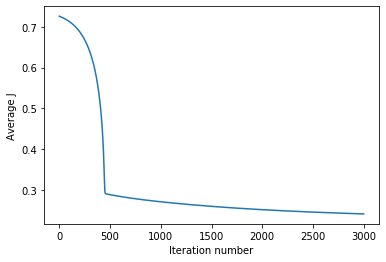

Prediction accuracy is 75.36880490634842%


In [0]:
# setup the NN structure
nn_structure = [14, 56, 1]
# train the NN
W, b, avg_cost_func = train_nn(nn_structure, X_train, y_train)
# plot the avg_cost_func
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()
# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

In [0]:
import pickle
pickle_out = open("/content/weights.pickle", "wb")
pickle.dump([W, b, avg_cost_func], pickle_out)
pickle_out.close()